In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit

In [3]:
print(sm.datasets.fair.SOURCE)


Fair, Ray. 1978. "A Theory of Extramarital Affairs," `Journal of Political
Economy`, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm



In [4]:
print(sm.datasets.fair.NOTE)

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
          

In [5]:
dta = sm.datasets.fair.load_pandas().data
dta['affair'] = (dta['affairs'] > 0).astype(float)
print(dta.head(10))

   rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0            3.0  32.0          9.0       3.0        3.0  17.0         2.0   
1            3.0  27.0         13.0       3.0        1.0  14.0         3.0   
2            4.0  22.0          2.5       0.0        1.0  16.0         3.0   
3            4.0  37.0         16.5       4.0        3.0  16.0         5.0   
4            5.0  27.0          9.0       1.0        1.0  14.0         3.0   
5            4.0  27.0          9.0       0.0        2.0  14.0         3.0   
6            5.0  37.0         23.0       5.5        2.0  12.0         5.0   
7            5.0  37.0         23.0       5.5        2.0  12.0         2.0   
8            3.0  22.0          2.5       0.0        2.0  12.0         3.0   
9            3.0  27.0          6.0       0.0        1.0  16.0         3.0   

   occupation_husb   affairs  affair  
0              5.0  0.111111     1.0  
1              4.0  3.230769     1.0  
2              5.0  1.40

In [6]:
print(dta.describe())

       rate_marriage          age  yrs_married     children    religious  \
count    6366.000000  6366.000000  6366.000000  6366.000000  6366.000000   
mean        4.109645    29.082862     9.009425     1.396874     2.426170   
std         0.961430     6.847882     7.280120     1.433471     0.878369   
min         1.000000    17.500000     0.500000     0.000000     1.000000   
25%         4.000000    22.000000     2.500000     0.000000     2.000000   
50%         4.000000    27.000000     6.000000     1.000000     2.000000   
75%         5.000000    32.000000    16.500000     2.000000     3.000000   
max         5.000000    42.000000    23.000000     5.500000     4.000000   

              educ   occupation  occupation_husb      affairs       affair  
count  6366.000000  6366.000000      6366.000000  6366.000000  6366.000000  
mean     14.209865     3.424128         3.850141     0.705374     0.322495  
std       2.178003     0.942399         1.346435     2.203374     0.467468  
min    

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to

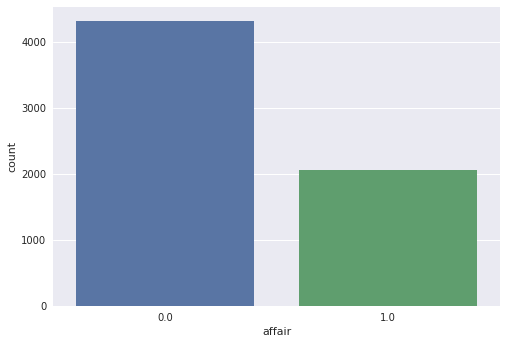

In [7]:
import seaborn as sns
sns.countplot(x='affair', data=dta)

In [8]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


In [9]:
Logit = logit("affair ~ C(occupation) + educ + C(occupation_husb)" 
                   "+ rate_marriage + age + yrs_married + children"
                   " + religious", dta).fit()
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(Logit.summary())

Optimization terminated successfully.
         Current function value: 0.542911
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 affair   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6349
Method:                           MLE   Df Model:                           16
Date:                Tue, 16 Oct 2018   Pseudo R-squ.:                  0.1365
Time:                        19:48:39   Log-Likelihood:                -3456.2
converged:                       True   LL-Null:                       -4002.5
                                        LLR p-value:                1.534e-222
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     2.9708      0.572      5.192      0.000       1.

In [10]:
print(np.exp(Logit.params))

Intercept                    19.506642
C(occupation)[T.2.0]          1.477333
C(occupation)[T.3.0]          2.019155
C(occupation)[T.4.0]          1.602231
C(occupation)[T.5.0]          2.869671
C(occupation)[T.6.0]          3.028342
C(occupation_husb)[T.2.0]     1.185835
C(occupation_husb)[T.3.0]     1.328662
C(occupation_husb)[T.4.0]     1.153546
C(occupation_husb)[T.5.0]     1.188068
C(occupation_husb)[T.6.0]     1.200530
educ                          0.998276
rate_marriage                 0.491532
age                           0.940561
yrs_married                   1.114021
children                      1.015768
religious                     0.687024
dtype: float64


In [11]:
Probit = probit("affair ~ C(occupation) + educ + C(occupation_husb)" 
                   "+ rate_marriage + age + yrs_married + children"
                   " + religious", dta).fit()

print(Probit.summary())

Optimization terminated successfully.
         Current function value: 0.542572
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                 affair   No. Observations:                 6366
Model:                         Probit   Df Residuals:                     6349
Method:                           MLE   Df Model:                           16
Date:                Tue, 16 Oct 2018   Pseudo R-squ.:                  0.1370
Time:                        19:49:06   Log-Likelihood:                -3454.0
converged:                       True   LL-Null:                       -4002.5
                                        LLR p-value:                1.815e-223
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.7922      0.325      5.514      0.000       1.

In [12]:
AME = Probit.get_margeff(at='overall')
print(AME.summary())

       Probit Marginal Effects       
Dep. Variable:                 affair
Method:                          dydx
At:                           overall
                               dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
C(occupation)[T.2.0]          0.0646      0.077      0.843      0.399      -0.085       0.215
C(occupation)[T.3.0]          0.1223      0.075      1.623      0.105      -0.025       0.270
C(occupation)[T.4.0]          0.0806      0.076      1.066      0.286      -0.068       0.229
C(occupation)[T.5.0]          0.1866      0.076      2.444      0.015       0.037       0.336
C(occupation)[T.6.0]          0.1986      0.085      2.323      0.020       0.031       0.366
C(occupation_husb)[T.2.0]     0.0289      0.033      0.882      0.378      -0.035       0.093
C(occupation_husb)[T.3.0]     0.0510      0.036      1.420      0.156      -0.019       0.121
C(

In [13]:
PEA = Probit.get_margeff(at='mean')
print(PEA.summary())

       Probit Marginal Effects       
Dep. Variable:                 affair
Method:                          dydx
At:                              mean
                               dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
C(occupation)[T.2.0]          0.0732      0.087      0.843      0.399      -0.097       0.243
C(occupation)[T.3.0]          0.1388      0.086      1.622      0.105      -0.029       0.306
C(occupation)[T.4.0]          0.0914      0.086      1.066      0.286      -0.077       0.260
C(occupation)[T.5.0]          0.2117      0.087      2.442      0.015       0.042       0.382
C(occupation)[T.6.0]          0.2252      0.097      2.321      0.020       0.035       0.415
C(occupation_husb)[T.2.0]     0.0328      0.037      0.882      0.378      -0.040       0.106
C(occupation_husb)[T.3.0]     0.0578      0.041      1.420      0.156      -0.022       0.138
C(

In [14]:
Probit.pred_table()

array([[3890.,  423.],
       [1322.,  731.]])

In [15]:
CC = 3890 + 731
IC = 423 +  1322

CC/(CC+IC)

0.7258875274897895

In [16]:
respondent11 = dta.iloc[[10]]
print(respondent11)

    rate_marriage   age  yrs_married  children  religious  educ  occupation  \
10            2.0  27.0          6.0       2.0        1.0  16.0         3.0   

    occupation_husb   affairs  affair  
10              5.0  3.266665     1.0  


In [17]:
Probit.predict()[0:11]

array([0.33452118, 0.73748271, 0.38220025, 0.44394865, 0.31242976,
       0.38356882, 0.53224527, 0.40988183, 0.49357343, 0.56782298,
       0.73011362])